# xarray, NetCDF files, and WOA data
The World Ocean Atlas data products are [described online](https://www.ncei.noaa.gov/access/world-ocean-atlas-2018/). To find the url you can use to load one of these datasets in your Notebook:
- click on the data of interest (temperature, salinity, oxygen, etc.)
- select NetCDF
- click on one of the desired filename 
- follow the OPeNDAP link
- copy the URL in the box (this page also shows the variables in the file)

For this class, I selected annual averages of temperature and dissolved oxygen gridded at 1$^\circ$.

In [2]:
# Import relevant modules
import numpy as np
import scipy as sp
import xarray as xr
import pandas as pd
import cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt 

In [3]:
t_url = ("https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/temperature/decav/1.00/woa18_decav_t00_01.nc")
o_url = ("https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc")

In [4]:
t = xr.open_dataset(t_url, decode_times=False)

In [5]:
o = xr.open_dataset(o_url, decode_times=False)

In [6]:
t

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 4.326e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa                (time, depth, lat, lon) float32 ...
    t_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

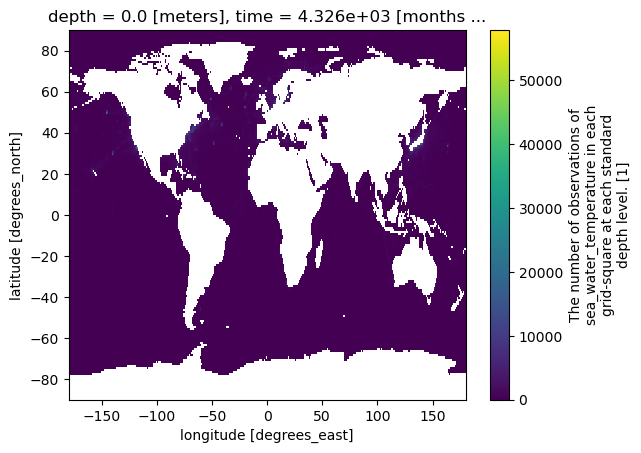

In [7]:
# Number of samples at each grid square
t.t_dd.sel(depth=0).plot()

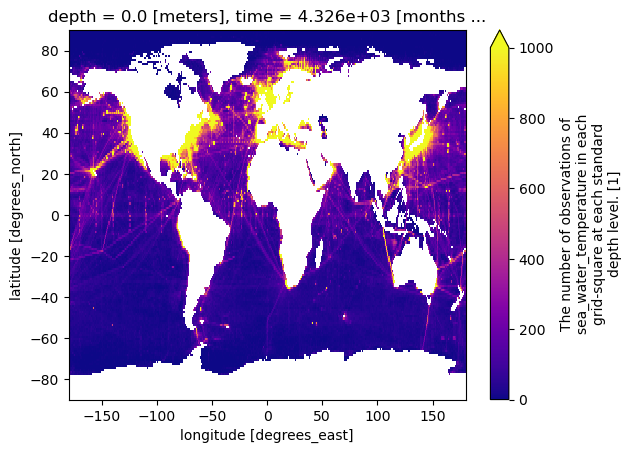

In [8]:
# Adjust the colorbar limits and colormap
t.t_dd.sel(depth=0).plot(vmax=1000, cmap='plasma')

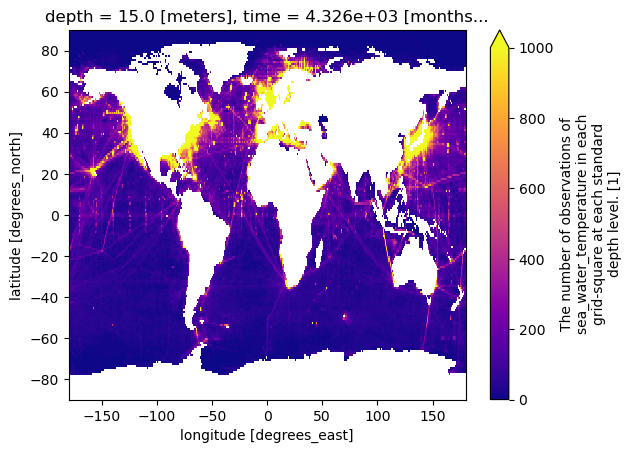

In [9]:
# Select a depth that is not in the range
t.t_dd.sel(depth=13, method='nearest').plot(vmax=1000, cmap='plasma')

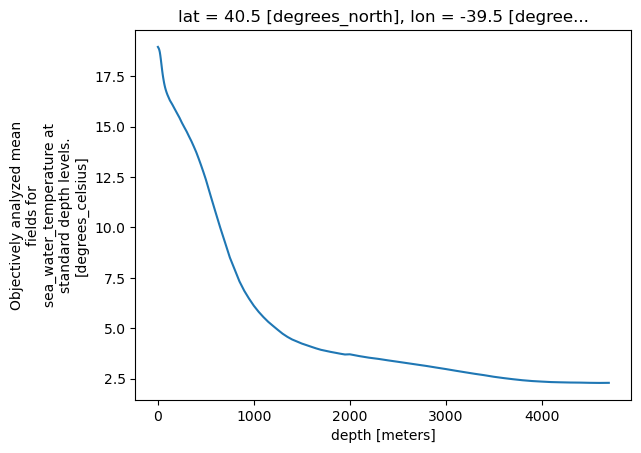

In [10]:
# Find the closest temperature profile to a selected lat, lon
t.t_an.sel(lat=40, lon=-40, method='nearest').plot()

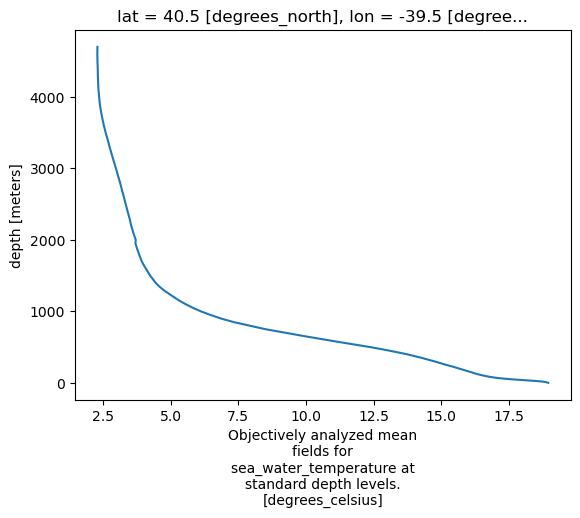

In [11]:
# Specify the y-axis
t.t_an.sel(lat=40, lon=-40, method='nearest').plot(y='depth')

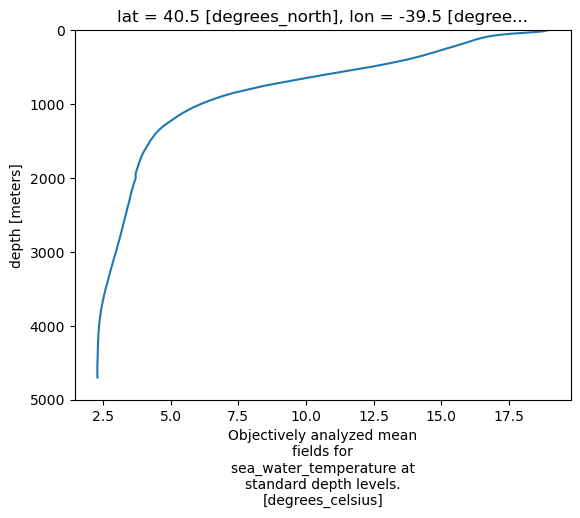

In [12]:
# Adjust the y-lim
t.t_an.sel(lat=40, lon=-40, method='nearest').plot(y='depth', ylim=(5000,0))

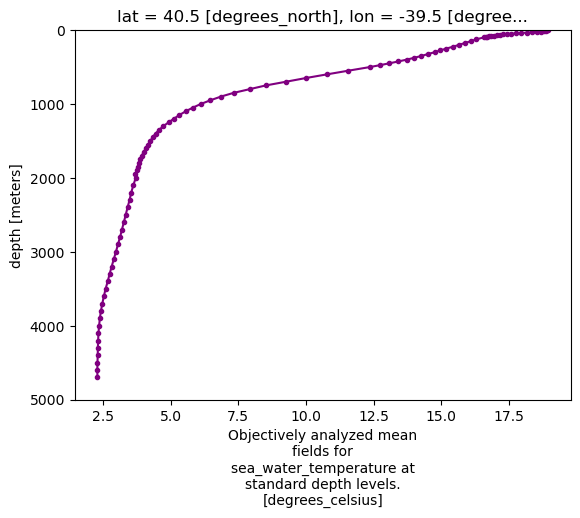

In [23]:
# Highlight the grid points
t.t_an.sel(lat=40, lon=-40, method='nearest').plot(
    y='depth', ylim=(5000,0), ls='-', marker='.', color='purple')

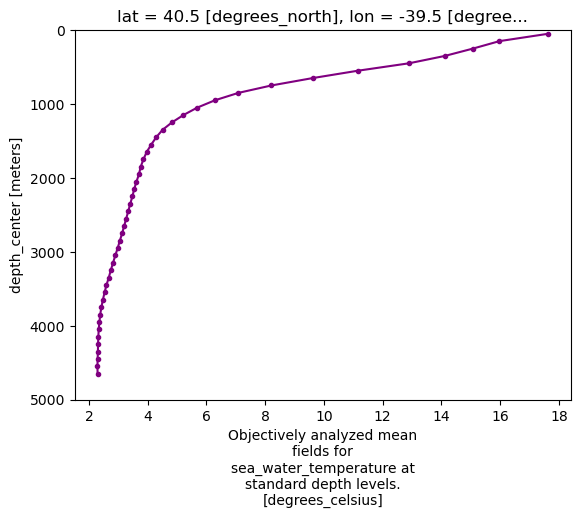

In [ ]:
# Bin at a different interval
t.t_an.sel(lat=40, lon=-40, method='nearest'
          ).groupby_bins("depth", np.arange(0,5000,100)).mean(
          ).plot(y='depth_bins', ylim=(5000,0), ls='-', marker='.', color='purple')